In [1]:
#!pip install --upgrade pingouin

# QUICK START

## T-TEST 

In [2]:
import numpy as np
import pandas as pd
import pingouin as pg

# Set the default Pandas float precision to 3 decimals
pd.set_option("display.precision", 3)

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.401,58,two-sided,0.001,"[-1.68, -0.43]",0.878,26.155,0.917


In [3]:
x

array([4.52499109, 4.42053181, 3.77897093, 6.36230346, 3.25533028,
       4.64956937, 2.95178623, 4.59135733, 1.04899568, 2.92923908,
       2.67380187, 4.31118852, 5.40671611, 3.82758588, 4.51066978,
       5.48020001, 5.89750199, 3.24810462, 3.68967198, 4.65983923,
       5.492979  , 4.09301762, 3.7024475 , 1.67554352, 2.12366377,
       5.62202531, 2.79728088, 3.49523787, 2.41851903, 2.18400827])

In [4]:
y

array([6.41704397, 4.07326086, 6.25606067, 6.97867234, 3.4800941 ,
       5.5648591 , 3.38033491, 5.20286174, 4.00491662, 4.2746547 ,
       5.00715313, 6.36288199, 5.83629382, 3.54973502, 4.73989277,
       3.97706582, 6.27151276, 4.09280014, 5.30523709, 5.91352322,
       4.94770443, 5.60624519, 4.69186599, 3.04486339, 5.12552003,
       5.69290489, 3.08347187, 5.45166315, 4.98813694, 4.14050216])

## PEARSON'S CORRELATION 

In [5]:
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.595,"[0.3, 0.79]",0.354,0.306,5.274e-04,69.723,0.95


## ROBUST CORRELATION  - MELIHAT OUTLIER PADA DATA

In [6]:
# Introduce an outlier
x[5] = 18
# Use the robust Shepherd's pi correlation
pg.corr(x, y, method="shepherd")

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,30,1,0.561,"[0.25, 0.77]",0.315,0.264,0.002,0.917


## TEST NORMALITY OF THE DATA

In [7]:
display(pg.normality(x))                                    # Univariate normality
pg.multivariate_normality(np.column_stack((x, y)))          # Multivariate normality

,W,pval,normal
0,0.615,1.129e-07,False


HZResults(hz=1.696773364612665, pval=0.00018201726664169543, normal=False)

## ONE WAY ANOVA USING PANDAS DATAFRAME 

In [8]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.460,1,5.460,5.244,0.023,0.029
1,Within,185.343,178,1.041,NaN,NaN,NaN


## Repeated measures ANOVA 

In [9]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Time,7.628,2,3.814,3.913,0.023,0.062,0.999
1,Error,115.027,118,0.975,NaN,NaN,NaN,NaN


## Post-hoc tests corrected for multiple-comparisons 

In [10]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject', 
                             parametric=True, padjust='fdr_bh', effsize='hedges')

posthoc

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Time,August,January,True,True,-1.740,59.0,two-sided,0.087,0.131,fdr_bh,0.582,-0.328
1,Time,August,June,True,True,-2.743,59.0,two-sided,0.008,0.024,fdr_bh,4.232,-0.483
2,Time,January,June,True,True,-1.024,59.0,two-sided,0.310,0.310,fdr_bh,0.232,-0.170


Non-parametric version (= pairwise wilcoxon tests)

In [11]:
# FDR-corrected post hocs with Hedges'g effect size
pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject', 
                   parametric=False, padjust='fdr_bh', effsize='hedges')

,Contrast,A,B,Paired,Parametric,W-val,Tail,p-unc,p-corr,p-adjust,hedges
0,Time,August,January,True,False,716.0,two-sided,0.144,0.216,fdr_bh,-0.328
1,Time,August,June,True,False,564.0,two-sided,0.010,0.030,fdr_bh,-0.483
2,Time,January,June,True,False,887.0,two-sided,0.840,0.840,fdr_bh,-0.170


## Two-way mixed ANOVA 

In [12]:
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                       subject='Subject', correction=False)
aov

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,5.460,1,58,5.460,5.052,0.028,0.080,NaN
1,Time,7.628,2,116,3.814,4.027,0.020,0.065,0.999
2,Interaction,5.167,2,116,2.584,2.728,0.070,0.045,NaN


## Pairwise correlations between columns of a dataframe¶

In [13]:
np.random.seed(123)
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

# Pairwise correlations
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,X,Y,pearson,two-sided,30,0.366,"[0.01, 0.64]",1.339e-01,0.070,0.384,0.047,1.5,0.525
1,X,Z,pearson,two-sided,30,0.251,"[-0.12, 0.56]",6.312e-02,-0.006,0.257,0.181,0.534,0.272
2,Y,Z,pearson,two-sided,30,0.020,"[-0.34, 0.38]",4.046e-04,-0.074,0.020,0.916,0.228,0.051


Alternative, as a correlation matrix with p-values

In [14]:
data[['X', 'Y', 'Z']].rcorr(method='spearman')

,X,Y,Z
X,-,***,
Y,0.573,-,
Z,0.168,0.021,-


## Convert between effect sizes 

In [15]:
# Convert from Cohen's d to Hedges' g
pg.convert_effsize(0.4, 'cohen', 'hedges', nx=10, ny=12)

0.38481012658227853

## Multiple linear regression 

In [16]:
pg.linear_regression(data[['X', 'Z']], data['Y'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.650,0.841,5.530,7.362e-06,0.139,0.076,2.925,6.376
1,X,0.143,0.068,2.089,4.630e-02,0.139,0.076,0.003,0.283
2,Z,-0.069,0.167,-0.416,6.809e-01,0.139,0.076,-0.412,0.273


## Mediation analysis

In [17]:
pg.mediation_analysis(data=data, x='X', m='Z', y='Y', seed=42, n_boot=1000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Z ~ X,0.103,0.075,0.181,-0.051,0.256,No
1,Y ~ Z,0.018,0.171,0.916,-0.332,0.369,No
2,Total,0.136,0.065,0.047,0.002,0.269,Yes
3,Direct,0.143,0.068,0.046,0.003,0.283,Yes
4,Indirect,-0.007,0.025,0.898,-0.069,0.029,No


## Plot achieved power of a paired T-test 

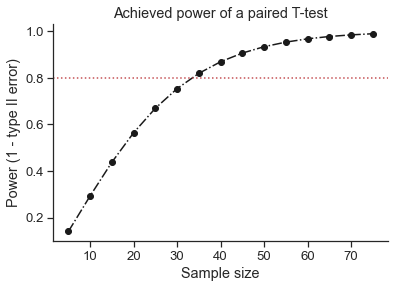

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='notebook', font_scale=1.2)

d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size

# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired', tail='two-sided')

# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

Plot the curve of achieved power given the effect size (Cohen d) and the sample size of a paired T-test.

## Paired plot 

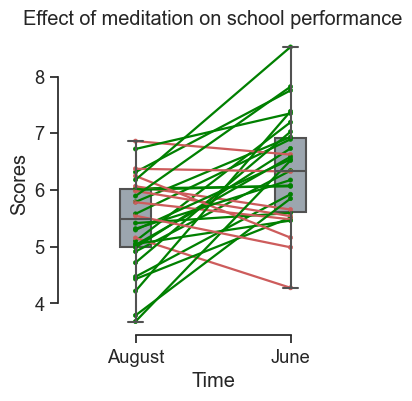

In [19]:
df = pg.read_dataset('mixed_anova').query("Group == 'Meditation' and Time != 'January'")
ax = pg.plot_paired(data=df, dv='Scores', within='Time', subject='Subject')
_ = ax.set_title("Effect of meditation on school performance")

## Chi-squared test of independence 

In [20]:
data = pg.read_dataset('chi2_independence')
expected, observed, stats = pg.chi2_independence(data, x='sex', y='target')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000,22.717,1.0,1.877e-06,0.274,0.997
1,cressie-read,0.667,22.931,1.0,1.679e-06,0.275,0.998
2,log-likelihood,0.000,23.557,1.0,1.212e-06,0.279,0.998
3,freeman-tukey,-0.500,24.220,1.0,8.595e-07,0.283,0.998
4,mod-log-likelihood,-1.000,25.071,1.0,5.526e-07,0.288,0.999
5,neyman,-2.000,27.458,1.0,1.605e-07,0.301,0.999


# ANOVA

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. In Pingouin, the one-way ANOVA is implemented in the anova function. The ANOVA test has three main assumptions that must be satisfied to provide accurate results:

1. The samples must be independent (i.e. by opposition with repeated measurements in a single group, in which case one should use repeated measures ANOVA (rm_anova).
2. Each sample should be normally distributed.
3. The variance of the samples are all equal (= homoscedasticity).

Note that assumptions #2 and #3 can be checked using the normality and homoscedasticity functions.

In [21]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Set the default Pandas float precision to 3 decimals
pd.set_option("display.precision", 3)

df = pg.read_dataset('anova')

df.groupby('Hair color')['Pain threshold'].agg(['mean', 'std', 'count']).round(2)

,mean,std,count
Hair color,,,
Dark Blond,51.2,9.28,5
Dark Brunette,37.4,8.32,5
Light Blond,59.2,8.53,5
Light Brunette,42.5,5.45,4


To run a one-way ANOVA in pingouin, the following arguments MUST be specified:

1. data : the pandas DataFrame (in long-format)
2. dv : the dependent variable
3. between : the between-subject factor

In [22]:
from pingouin import anova

aov = pg.anova(data=df, dv='Pain threshold', between='Hair color', detailed=True)
# Similar to df.anova(dv='Pain threshold', between='Hair color', detailed=True)

aov

,Source,SS,DF,MS,F,p-unc,np2
0,Hair color,1360.726,3,453.575,6.791,0.004,0.576
1,Within,1001.800,15,66.787,NaN,NaN,NaN



The detailed ANOVA summary table includes the following columns:

1. SS : sums of squares
2. DF : degrees of freedom
3. MS : mean squares (= SS / DF)
4. F : F-value (test statistic)
5. p-unc : uncorrected p-values
6. np2 : partial eta-square effect size *

* In one-way ANOVA, partial eta-square is the same as eta-square and generalized eta-square.

In the example above, there is a main effect of group (F(3, 15) = 6.79, p = .004)), so we can reject the null hypothesis that the groups have equal means.

## Tukey post-hocs 

Often, you will want to compute post-hoc tests to look at the pairwise differences between the groups. For one-way ANOVA with equal variances between groups, the optimal test is the pairwise_tukey post-hoc test.

As one can see from the post-hoc summary table below, the light blond group has a significantly higher pain threshold than the dark brunette (p=.0037) and light brunette (p=.0367) groups.

In [23]:
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.169,2.670,0.074,1.525
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.169,-1.548,0.437,-0.884
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482,1.587,0.416,0.946
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.169,-4.218,0.004,-2.409
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482,-0.930,0.770,-0.555
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482,3.046,0.037,1.816


## Power of the ANOVA 

In some cases, it might be useful to compute the power of the test, i.e. the probability that we correctly reject the null hypothesis when it is indeed false (with higher power indicating higher reliability). This can be calculated easily from the ANOVA summary using the power_anova function.

In [25]:
k = df['Hair color'].nunique()  # Number of groups
n = df.shape[0] / k  # Number of observations per group
achieved_power = pg.power_anova(eta=aov.loc[0, 'np2'], k=k, n=n, alpha=0.05)
print('Achieved power: %.4f' % achieved_power)

Achieved power: 0.9729


## Assumptions check 

Finally, to check that (1) each sample is normally distributed and (2) the variance of the samples are all equal, we can use the normality and homoscedasticity functions, respectively. The first output value of these two functions is a boolean that indicates whether the assumption is met (True) or not (False). The second value is the corresponding p-value of the test.

In [26]:
pg.normality(df, group='Hair color', dv='Pain threshold')

,W,pval,normal
Light Blond,0.991,0.983,True
Dark Blond,0.940,0.664,True
Light Brunette,0.931,0.598,True
Dark Brunette,0.883,0.324,True


In [27]:
pg.homoscedasticity(df, group='Hair color', dv='Pain threshold')

,W,pval,equal_var
levene,0.393,0.76,True


## What if my groups have unequal variances? 

Traditional ANOVA can be quite unstable when the groups have unequal variances (see Liu 2015). Therefore, it is recommended to use a Welch ANOVA instead, followed by Games-Howell post-hoc tests, which do not require the groups to have equal variances.

In [28]:
pg.welch_anova(data=df, dv='Pain threshold', between='Hair color')

,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,8.33,5.89,0.019,0.576


In [29]:
pg.pairwise_gameshowell(data=df, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.577,2.475,7.907,0.140,1.414
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.637,-1.419,7.943,0.522,-0.811
2,Dark Blond,Light Brunette,51.2,42.5,8.7,4.966,1.752,6.563,0.372,1.045
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.329,-4.091,7.995,0.015,-2.337
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,4.613,-1.106,6.822,0.685,-0.659
5,Light Blond,Light Brunette,59.2,42.5,16.7,4.686,3.564,6.772,0.038,2.125


## One-way repeated measures ANOVA 

The one-way repeated measures ANOVA is the equivalent of the one-way ANOVA, but for related, not independent groups. It is sometimes called within-subjects ANOVA.

In Pingouin, the one-way repeated measures ANOVA is implemented in the rm_anova function. The repeated measures ANOVA test has several assumptions that must be satisfied to provide accurate results:

1. Normality: for each level of the within-subjects factor, the dependent variable must have a normal distribution.
2. Sphericity: difference scores computed between two levels of a within-subjects factor must have the same variance for the comparison of any two levels. (This assumption only applies if there are more than 2 levels of the independent variable.)
3. Randomness: cases should be derived from a random sample, and scores from different participants should be independent of each other.

For this first example, we are going to create a fake dataset comprising the memory scores (on a 1-to-5 scale) of 20 older adults acquired with a four-year interval. The objective of the study is to see how memory deteriorates with aging.

In [30]:
# Ensure reproducibility of the results
np.random.seed(123)

# Create three normally-distributed vectors.
n = 20
perf2010 = np.random.normal(loc=5, scale=0.8, size=n)     # Mean = 5, standard deviation = 0.8, size = 20
perf2014 = np.random.normal(loc=4.8, scale=0.8, size=n)   # Mean = 4.8, ...
perf2018 = np.random.normal(loc=3, scale=0.8, size=n)     # Mean = 3, ...

# Concatenate in a long-format pandas DataFrame
df = pd.DataFrame({'Memory': np.r_[perf2010, perf2014, perf2018],
                   'Year': np.repeat(['2010', '2014', '2018'], n),
                   'Subject': np.tile(np.arange(n), 3)})
df.head()

,Memory,Year,Subject
0,4.131,2010,0
1,5.798,2010,1
2,5.226,2010,2
3,3.795,2010,3
4,4.537,2010,4


Let's plot the mean and standard deviation using the seaborn package

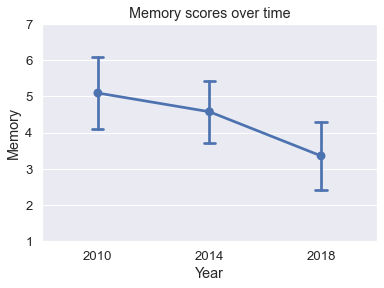

In [31]:
sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=df, x='Year', y='Memory', capsize=.1, ci='sd')
plt.ylim(1, 7)
_ = plt.title('Memory scores over time')

## Run the ANOVA 

To run a repeated-measures ANOVA in pingouin, the following arguments MUST be specified:

1. data : the pandas DataFrame (in long-format or wide-format)
2. dv : the dependent variable (only if data is in long-format)
3. within : the within-subject factor (only if data is in long-format)
4. subject : the subject identifier (only if data is in long-format)

In the example below, we are going to test if the means of the memory scores have changed across the three time points:

In [32]:
pg.rm_anova(data=df, dv='Memory', within='Year', subject='Subject')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Year,2,38,17.365,4.398e-06,0.478,0.988


From the example above, it is clear that the means of the three time points are significantly different (F(2, 38)=23.9, p=1.89e-07). We can now further test the pairwise differences between each measurements using the pairwise_ttests function:

In [33]:
# Holm-corrected pairwise T-tests
pg.pairwise_ttests(data=df, dv='Memory', within='Year', subject='Subject', return_desc=True, padjust='holm')

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Year,2010,2014,5.092,1.006,4.575,0.876,True,True,1.629,19.0,two-sided,1.197e-01,1.197e-01,holm,0.717,0.537
1,Year,2010,2018,5.092,1.006,3.357,0.953,True,True,5.762,19.0,two-sided,1.494e-05,4.481e-05,holm,1532.361,1.736
2,Year,2014,2018,4.575,0.876,3.357,0.953,True,True,4.228,19.0,two-sided,4.549e-04,9.099e-04,holm,72.806,1.305


## A note on sphericity 

The repeated measures ANOVA table is very similar to the one-way ANOVA table, with an additional eps column. This refers to the epsilon statistic, which indicates the degree to which sphericity is present or not. An epsilon of 1 means that the condition of sphericity is exactly met. The further epsilon decreases below 1, the greater the violation of sphericity. In the example above, the condition of sphericity is almost exactly met.

Another way to understand sphericity is to look at the covariance matrix of our data. If the variances of each measurements (i.e. elements on the diagonal of the covariance matrix) are roughly equal AND the covariances between measurements (i.e the off-diagonal elements) are also roughly equal, then we can be pretty confident that the assumption of sphericity is met (this is called compound symmetry, which is slightly different and more conservative than sphericity, the latter being that the variances between the pairwise differences are equals ; for more details on this, see here).

To compute the covariance matrix, we first need to pivot our data from long-format to repeated measures format, i.e. one column per each repeated measurements.

In [34]:
# Pivot the data
pivot = df.pivot(index='Subject', columns='Year', values='Memory')
pivot.head().round(3)

Year,2010,2014,2018
Subject,,,
0,4.131,5.390,2.356
1,5.798,5.993,1.618
2,5.226,4.051,2.687
3,3.795,5.741,3.459
4,4.537,3.797,3.271


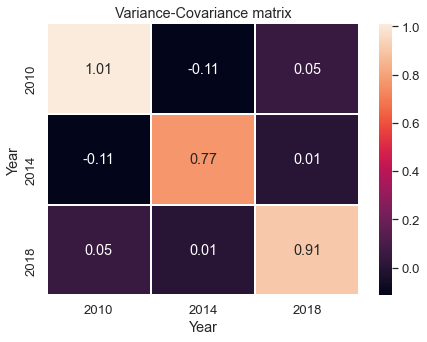

In [35]:
# Plot the variance-covariance matrix
plt.figure(figsize=(7, 5))
ax = sns.heatmap(pivot.cov(), annot=True, fmt='.2f', linewidths=1)
_ = plt.title('Variance-Covariance matrix')

## What if sphericity is not met? 

When you are doing a repeated measures ANOVA, Pingouin automatically tests if the sphericity assumption is met using the sphericity function, which is based on the Mauchly test.

If the sphericity assumption is not met, Pingouin returns the Mauchly test chi-square statistic and p-values, as well as the Greenhouse-Geisser corrected p-value of the ANOVA (The Greenhouse-Geisser correction uses epsilon to correct the degrees of freedom of the ANOVA).

You can force the correction using correction=True:

In [37]:
pg.rm_anova(data=df, dv='Memory', within='Year', subject='Subject', correction=True)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Year,2,38,17.365,4.398e-06,4.932e-06,0.478,0.988,True,0.988,0.895


Another alternative when the sphericity assumption is not met is to use a one-sample Hotelling T-squared test (see more here) on the differences.

To illustrate this, we'll load a repeated measures ANOVA dataset in wide-format:

In [38]:
data_wide = pg.read_dataset('rm_anova_wide')
data_wide

,Before,1 week,2 week,3 week
0,4.3,5.3,4.8,6.3
1,3.9,2.3,5.6,4.3
2,4.5,2.6,4.1,NaN
3,5.1,4.2,6.0,6.3
4,3.8,3.6,4.8,6.8
5,3.8,5.4,5.1,6.3
6,5.1,3.7,NaN,NaN
7,4.5,3.0,7.7,5.8
8,3.7,7.1,5.5,4.8
9,4.4,4.7,4.2,5.5


Let's now compute the difference between successive columns:

In [39]:
data_wide_diff = data_wide.diff(axis=1).dropna(how='all', axis=1)
data_wide_diff.head()

,1 week,2 week,3 week
0,1.0,-0.5,1.5
1,-1.6,3.3,-1.3
2,-1.9,1.5,NaN
3,-0.9,1.8,0.3
4,-0.2,1.2,2.0


And now let's compute the one-sample Hotelling T-squared test

In [40]:
pg.multivariate_ttest(data_wide_diff)

,T2,F,df1,df2,pval
hotelling,60.143,15.036,3,6,0.003


The results are consistent with a classic one-way repeated measures ANOVA. As one can see below, the p-value of the Hotelling T-squared is roughly located between the uncorrected p-value and the Greenhouse-Geisser p-value. The advantage of the Hotelling T-squared is that it doesn't require the sphericity assumption. 

In [41]:
pg.rm_anova(data_wide, correction=True)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Within,3,24,5.201,0.007,0.017,0.394,0.694,True,0.307,0.163


## Mixed ANOVA 

In some cases, you might want to take the interation between a within-subject factor (e.g. time) and a between-subject factor (e.g. Group). This is done using a mixed two-way ANOVA.

We are first going to add a group factor to our previously created memory dataset.

In [42]:
df['Sex'] = np.tile(np.repeat(['Men', 'Women'], 10), 3)
df.head()

,Memory,Year,Subject,Sex
0,4.131,2010,0,Men
1,5.798,2010,1,Men
2,5.226,2010,2,Men
3,3.795,2010,3,Men
4,4.537,2010,4,Men


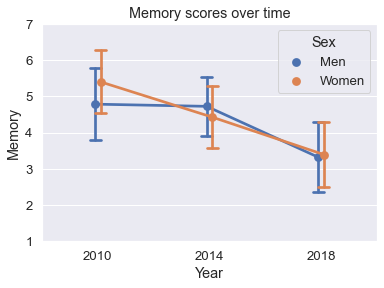

In [43]:
sns.pointplot(data=df, x='Year', y='Memory', hue='Sex', dodge=True, capsize=.1, ci='sd')
plt.ylim(1, 7)
_ = plt.title('Memory scores over time')

In [44]:
pg.mixed_anova(data=df, dv='Memory', between='Sex', within='Year', subject='Subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Sex,0.253,1,18,0.253,0.283,6.010e-01,0.016,NaN
1,Year,31.733,2,36,15.866,17.514,4.873e-06,0.493,0.988
2,Interaction,2.106,2,36,1.053,1.162,3.242e-01,0.061,NaN


In [45]:
# Same but we want a generalized eta-squared ('ng2') instead of the default partial eta-squared ('np2')
pg.mixed_anova(data=df, dv='Memory', between='Sex', within='Year', subject='Subject', effsize='ng2')

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Sex,0.253,1,18,0.253,0.283,6.010e-01,0.005,NaN
1,Year,31.733,2,36,15.866,17.514,4.873e-06,0.395,0.988
2,Interaction,2.106,2,36,1.053,1.162,3.242e-01,0.041,NaN


Having calculated the ANOVA, we can now run pairwise T-tests. By default, Pingouin will calculate the within between interaction (in this case, year sex).

In [46]:
pg.pairwise_ttests(data=df, dv='Memory', between='Sex', within='Year', subject='Subject')

,Contrast,Year,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Year,-,2010,2014,True,True,1.629,19.0,two-sided,1.197e-01,0.717,0.537
1,Year,-,2010,2018,True,True,5.762,19.0,two-sided,1.494e-05,1532.361,1.736
2,Year,-,2014,2018,True,True,4.228,19.0,two-sided,4.549e-04,72.806,1.305
3,Sex,-,Men,Women,False,True,-0.532,18.0,two-sided,6.010e-01,0.439,-0.228
4,Year * Sex,2010,Men,Women,False,True,-1.399,18.0,two-sided,1.787e-01,0.779,-0.599
5,Year * Sex,2014,Men,Women,False,True,0.753,18.0,two-sided,4.613e-01,0.485,0.322
6,Year * Sex,2018,Men,Women,False,True,-0.169,18.0,two-sided,8.677e-01,0.401,-0.072


To get the between * within interaction, one can use the within_first argument:

In [47]:
pg.pairwise_ttests(data=df, dv='Memory', between='Sex', within='Year', subject='Subject', within_first=False)

,Contrast,Sex,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Sex,-,Men,Women,False,True,-0.532,18.0,two-sided,6.010e-01,0.439,-0.228
1,Year,-,2010,2014,True,True,1.629,19.0,two-sided,1.197e-01,0.717,0.537
2,Year,-,2010,2018,True,True,5.762,19.0,two-sided,1.494e-05,1532.361,1.736
3,Year,-,2014,2018,True,True,4.228,19.0,two-sided,4.549e-04,72.806,1.305
4,Sex * Year,Men,2010,2014,True,True,0.127,9.0,two-sided,9.020e-01,0.311,0.060
5,Sex * Year,Men,2010,2018,True,True,2.587,9.0,two-sided,2.936e-02,2.65,1.363
6,Sex * Year,Men,2014,2018,True,True,3.024,9.0,two-sided,1.440e-02,4.636,1.426
7,Sex * Year,Women,2010,2014,True,True,2.493,9.0,two-sided,3.426e-02,2.352,1.022
8,Sex * Year,Women,2010,2018,True,True,9.348,9.0,two-sided,6.253e-06,3111.139,2.069
9,Sex * Year,Women,2014,2018,True,True,2.896,9.0,two-sided,1.772e-02,3.934,1.071


## Missing values in repeated measures 

to deal with missing values in long-format dataframe with repeated measures, Pingouin implements the remove_rm_na function, which will automatically remove the missing values in specified within-subject factors. To illustrate this, let's load an example dataset

In [48]:
df_missing = pg.read_dataset('rm_missing')
df_missing.head(12)

,Study,Subj,Gender,Session,Time,Memory,BOLD,Mood,File
0,Pilot,1,M,Pre,Evening,4.0,2.0,NaN,S1_pre_evening.csv
1,Pilot,1,M,Pre,Morning,7.0,NaN,NaN,S1_pre_morning.csv
2,Pilot,1,M,Post,Evening,4.0,7.0,NaN,S1_post_evening.csv
3,Pilot,1,M,Post,Morning,5.0,NaN,NaN,S1_post_morning.csv
4,Pilot,2,M,Pre,Evening,5.0,6.0,3.0,S2_pre_evening.csv
5,Pilot,2,M,Pre,Morning,1.0,9.0,9.0,S2_pre_morning.csv
6,Pilot,2,M,Post,Evening,5.0,10.0,8.0,S2_post_evening.csv
7,Pilot,2,M,Post,Morning,6.0,5.0,3.0,S2_post_morning.csv
8,Pilot,3,F,Pre,Evening,NaN,10.0,6.0,S3_pre_evening.csv
9,Pilot,3,F,Pre,Morning,2.0,6.0,5.0,S3_pre_morning.csv


In [49]:
# Let's remove the missing rows in the "Time" factor, based on the values in "Memory"
# The order of within matters: missing values are removed on the last factor
pg.remove_rm_na(data=df_missing, dv='Memory', subject='Subj', within=['Session', 'Time'])

,Study,Subj,Gender,Session,Time,Memory,BOLD,Mood,File
0,Pilot,1,M,Post,Evening,4.0,7.0,NaN,S1_post_evening.csv
1,Pilot,1,M,Post,Morning,5.0,NaN,NaN,S1_post_morning.csv
2,Pilot,1,M,Pre,Evening,4.0,2.0,NaN,S1_pre_evening.csv
3,Pilot,1,M,Pre,Morning,7.0,NaN,NaN,S1_pre_morning.csv
4,Pilot,2,M,Post,Evening,5.0,10.0,8.0,S2_post_evening.csv
5,Pilot,2,M,Post,Morning,6.0,5.0,3.0,S2_post_morning.csv
6,Pilot,2,M,Pre,Evening,5.0,6.0,3.0,S2_pre_evening.csv
7,Pilot,2,M,Pre,Morning,1.0,9.0,9.0,S2_pre_morning.csv
8,Pilot,4,F,Post,Evening,8.0,8.0,5.0,S4_post_evening.csv
9,Pilot,4,F,Post,Morning,2.0,7.0,3.0,S4_post_morning.csv


In [50]:
# If we do not specifiy a specific dv, missing values are taken from all the numeric columns
pg.remove_rm_na(data=df_missing, subject='Subj', within=['Session', 'Time'])

,Study,Subj,Gender,Session,Time,Memory,BOLD,Mood,File
0,Pilot,2,M,Post,Evening,5.0,10.0,8.0,S2_post_evening.csv
1,Pilot,2,M,Post,Morning,6.0,5.0,3.0,S2_post_morning.csv
2,Pilot,2,M,Pre,Evening,5.0,6.0,3.0,S2_pre_evening.csv
3,Pilot,2,M,Pre,Morning,1.0,9.0,9.0,S2_pre_morning.csv
4,Pilot,4,F,Post,Evening,8.0,8.0,5.0,S4_post_evening.csv
5,Pilot,4,F,Post,Morning,2.0,7.0,3.0,S4_post_morning.csv
6,Pilot,4,F,Pre,Evening,8.0,2.0,2.0,S4_pre_evening.csv
7,Pilot,4,F,Pre,Morning,4.0,2.0,0.0,S4_pre_morning.csv
8,Pilot,5,F,Post,Evening,9.0,10.0,8.0,S5_post_evening.csv
9,Pilot,5,F,Post,Morning,3.0,6.0,7.0,S5_post_morning.csv


In [51]:
# Finally, if there are more within-subject factors in the data than specified in `within`, 
# values are first aggregated. The default is to use the mean. In that case, all the non-numeric columns are discarded:
pg.remove_rm_na(data=df_missing, subject='Subj', within='Session', aggregate='mean')

,Subj,Session,Memory,BOLD,Mood
0,2,Post,5.5,7.5,5.5
1,2,Pre,3.0,7.5,6.0
2,3,Post,1.0,4.5,6.0
3,3,Pre,2.0,8.0,5.5
4,4,Post,5.0,7.5,4.0
5,4,Pre,6.0,2.0,1.0
6,6,Post,7.0,3.5,4.0
7,6,Pre,7.5,5.0,8.5
8,7,Post,6.0,8.0,4.0
9,7,Pre,6.5,4.0,6.0


## Wide-format data 

To remove missing values in wide-format dataframe, one can simply use the Pandas dropna function:

In [52]:
data_wide

,Before,1 week,2 week,3 week
0,4.3,5.3,4.8,6.3
1,3.9,2.3,5.6,4.3
2,4.5,2.6,4.1,NaN
3,5.1,4.2,6.0,6.3
4,3.8,3.6,4.8,6.8
5,3.8,5.4,5.1,6.3
6,5.1,3.7,NaN,NaN
7,4.5,3.0,7.7,5.8
8,3.7,7.1,5.5,4.8
9,4.4,4.7,4.2,5.5


In [53]:
data_wide.dropna()  # Remove rows with NaN

,Before,1 week,2 week,3 week
0,4.3,5.3,4.8,6.3
1,3.9,2.3,5.6,4.3
3,5.1,4.2,6.0,6.3
4,3.8,3.6,4.8,6.8
5,3.8,5.4,5.1,6.3
7,4.5,3.0,7.7,5.8
8,3.7,7.1,5.5,4.8
9,4.4,4.7,4.2,5.5
11,3.7,3.0,4.0,7.1


In [54]:
data_wide.dropna(axis=1)  # Remove columns with NaN

,1 week
0,5.3
1,2.3
2,2.6
3,4.2
4,3.6
5,5.4
6,3.7
7,3.0
8,7.1
9,4.7


# BAYESIAN T-TEST

In this tutorial we will see how to compute a classical and Bayesian T-test in Pingouin using the ttest function.

The method used in Pingouin is derived from Rouder et al. 2009 and uses the recommended Cauchy prior distribution on effect size, centered around 0 and with a width (r) factor of 0.707. This default values applies well for most cases (at least for psychological studies with typically small to moderate effect sizes).

In simple words, it means that you expect (i.e. your prior) that the effect size will most likely fall between -.707 and +.707. Note that this parameter can be adjusted by using the r optional argument function. Use smaller values if you expect smaller effect sizes, and larger values if you expect larger effect sizes.

For the sake of this example, we will generate a fake drug / placebo study with 30 subjects in each group. We are interested in comparing the memory performances after administration of the drug or the placebo.

In [55]:
import numpy as np
np.random.seed(123)
nx, ny = 30, 30
drug = np.random.normal(loc=1, size=nx)
placebo = np.random.normal(loc=0, size=ny)

Computing the (Bayesian) T-test can be done simply using:

In [56]:
from pingouin import ttest
ttest(drug, placebo)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.891,58,two-sided,0.005,"[0.28, 1.53]",0.746,7.71,0.811


The p-value is significantly inferior to 0.05, meaning that we can reject the null hypothesis that the two groups have similar performances. However, the p-value can simply be used to reject or accept the null hypothesis, given an arbitrary threshold. It does not allow to quantify per se the evidence in favor of the alternative hypothesis (which is that the groups have different performances).

To do so, we need to rely on the Bayes Factor (BF10), first introduced by Jeffreys in 1961. The Bayes Factor is an odds ratio and has therefore an intuitive interpretation: in the example above, it means that the alternative hypothesis is 7.71 times more likely than the null hypothesis, given the data. To quantify the odds in favor of the null hypothesis (BF01), we can simply compute the reciprocal of the BF10:

In [57]:
print('BF01 = %.2f' % (1 / 7.71))

BF01 = 0.13


As a rule of thumbs, Jeffreys (1961) recommended that a Bayes Factor greater than 3 be considered “some evidence”, greater than 10 “strong evidence”, and greater than 30 “very strong evidence”. In the example above, it means that there are a moderate to strong evidence that the drug actually works.

Note that the ttest function has several optional arguments. For instance, if the data come from a single group (paired measurements), and if we have an a priori that the drug will indeed work, we could adjust the tail and paired arguments:

In [58]:
ttest(drug, placebo, paired=True, tail='greater')

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.717,29,greater,0.006,"[0.34, inf]",0.746,8.309,0.99


# EFFECT SIZES

Effect sizes are a way of quantifying the magnitude of the difference between two groups. They are useful to determine the sample size for follow-up studies, or examining effects across studies. In this tutorial, we will see how to compute effect sizes using Pingouin.

The effect sizes supported in Pingouin are:

1. Cohen's d for independent measures
2. Cohen's d-average for repeated measures
3. Hedges' g (corrected Cohen d, better for small sample size)
4. Eta-squared
5. Odds-ratio
6. Area Under the Curve (AUC)
7. Common Language Effect Size (CLES)

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

np.random.seed(123)
nx, ny = 500, 500
x = np.random.normal(loc=174, size=nx) # mean = 174 cm, variance = 1
y = np.random.normal(loc=175, size=ny) # mean = 175 cm, variance = 1

C:\Users\DELL-POJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL-POJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

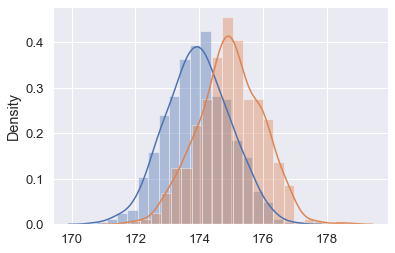

In [60]:
sns.distplot(x, kde=True, label='France')
sns.distplot(y, kde=True, label='UK')

In [61]:
from pingouin import compute_effsize
eftype = 'hedges' # 'cohen', 'hedges', 'eta-square', 'odds-ratio', 'AUC'
ef = compute_effsize(x=x, y=y, eftype=eftype, paired=False)
print(eftype, ': %.3f' % ef)

hedges : -0.996


## Using a T-value 

If you don't have the raw data, effect size can be computed from a T-value and sample size:

In [62]:
from pingouin import compute_effsize_from_t
# using a T-value when nx and ny are known
tval, _ = ttest_ind(x, y)
ef = compute_effsize_from_t(tval, nx=len(x), ny=len(y), eftype=eftype)
print(eftype, '(from T - nx + ny): %.3f' % ef)

# using a T-value when only total sample size is known
tval, _ = ttest_ind(x, y)
ef = compute_effsize_from_t(tval, N=len(x) + len(y), eftype='cohen')
print('cohen (from T - only N): %.3f' % ef)

hedges (from T - nx + ny): -0.996
cohen (from T - only N): -0.996


## Confidence intervals 

Parametric and bootstrapped confidence intervals of effect sizes and correlation coefficients can be computed using the compute_esci and compute_bootci functions, respectively. The former method only requires the original effect sizes and sample sizes, while the latter method requires the raw values.

In [63]:
from pingouin import compute_esci, compute_bootci

# Cohen's d
d = compute_effsize(x, y, eftype='cohen')
print('Cohen d:\t%.3f' % d)

# Parametric 95% confidence intervals of Cohen's d effect size
print('Parametric:\t', compute_esci(stat=d, nx=nx, ny=ny, confidence=0.95, eftype='cohen'))

# Bootstrapped 95% confidence intervals of Cohen's d effect size
print('Bootstrapped:\t', compute_bootci(x=x, y=y, func='cohen', confidence=0.95, n_boot=2000, seed=123))

Cohen d:	-0.996
Parametric:	 [-1.13 -0.86]
Bootstrapped:	 [-1.13 -0.87]


## Converting effect sizes 

It is possible to convert between several types of effect sizes using the convert_effsize function:

In [64]:
from pingouin import convert_effsize
# Convert from Cohen's d to eta-square:
eta = convert_effsize(ef=d, input_type='cohen', output_type='eta-square')
print('Eta:\t%.3f' % eta)

# Convert from Cohen's d to hedges (requires sample size):
hedges = convert_effsize(ef=d, input_type='cohen', output_type='hedges', nx=500, ny=500)
print('Hedges:\t%.3f' % hedges)

Eta:	0.199
Hedges:	-0.996


# CORRELATIONS

## Simple correlation 

Computing a correlation between two variables in Pingouin is done using the corr function

In [65]:
import pandas as pd
import pingouin as pg

# Set the default Pandas float precision to 3 decimals
pd.set_option("display.precision", 3)

x = [4, 5, 7, 4, 5, 6, 8, 9]
y = [3, 4, 5, 3, 4, 5, 4, 3]

pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,8,0.185,"[-0.6, 0.79]",0.034,-0.352,0.661,0.468,0.072


The corr function returns a pandas DataFrame with:

1. The sample size n (after removal of NaN)
2. the correlation coefficient (r)
3. the parametric 95% confidence intervals of the coefficient (CI95%)
4. the R2 (= coefficient of determination, r2)
5. the adjusted R2 (adj_r2)
6. the p-value (p-unc)
7. the Bayes Factor for the alternative hypothesis (BF10)
8. the achieved power of the test (power, = 1 - type 2 error)

By default, the function returns the two-sided Pearson's correlation coefficients. This can be adjusted using the tail and method arguments:

In [66]:
pg.corr(x, y, method='spearman', tail='one-sided')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,8,0.319,"[-0.5, 0.84]",0.102,-0.258,0.221,0.201


## Pairwise correlations


We will now see how to compute pairwise correlations coefficients across columns of a pandas DataFrame using the pairwise_corr function.

To do so, we will first load an example dataset in which each row represents one subject and each columns represent a score on the well-known Big Five personality traits. There are 500 subjects in total.

In [67]:
df = pg.read_dataset('pairwise_corr')

# Remove the 'Subject' column
df.drop(columns='Subject', inplace=True)

# Print the first lines
df.head()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,2.479,4.208,3.938,3.958,3.458
1,2.604,3.188,3.958,3.396,3.229
2,2.812,2.896,3.417,2.750,3.500
3,2.896,3.562,3.521,3.167,2.792
4,3.021,3.333,4.021,3.208,2.854


Let's see if the personality dimensions are correlated or not. For that, we will compute the pairwise correlations between all the columns of the DataFrame:

In [68]:
pg.pairwise_corr(df)  # Similar to df.pairwise_corr()

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Neuroticism,Extraversion,pearson,two-sided,500,-0.350,"[-0.42, -0.27]",1.226e-01,1.190e-01,-0.366,7.323e-16,6.765e+12,1.000
1,Neuroticism,Openness,pearson,two-sided,500,-0.010,"[-0.1, 0.08]",1.078e-04,-3.916e-03,-0.010,8.169e-01,0.058,0.056
2,Neuroticism,Agreeableness,pearson,two-sided,500,-0.134,"[-0.22, -0.05]",1.804e-02,1.409e-02,-0.135,2.615e-03,5.122,0.854
3,Neuroticism,Conscientiousness,pearson,two-sided,500,-0.368,"[-0.44, -0.29]",1.354e-01,1.319e-01,-0.386,1.759e-17,2.644e+14,1.000
4,Extraversion,Openness,pearson,two-sided,500,0.267,"[0.18, 0.35]",7.136e-02,6.762e-02,0.274,1.288e-09,5.277e+06,1.000
5,Extraversion,Agreeableness,pearson,two-sided,500,0.055,"[-0.03, 0.14]",2.975e-03,-1.037e-03,0.055,2.234e-01,0.117,0.230
6,Extraversion,Conscientiousness,pearson,two-sided,500,0.065,"[-0.02, 0.15]",4.172e-03,1.647e-04,0.065,1.492e-01,0.158,0.303
7,Openness,Agreeableness,pearson,two-sided,500,0.159,"[0.07, 0.24]",2.535e-02,2.143e-02,0.161,3.517e-04,32.635,0.948
8,Openness,Conscientiousness,pearson,two-sided,500,-0.013,"[-0.1, 0.07]",1.809e-04,-3.843e-03,-0.013,7.642e-01,0.059,0.060
9,Agreeableness,Conscientiousness,pearson,two-sided,500,0.159,"[0.07, 0.24]",2.518e-02,2.125e-02,0.160,3.685e-04,31.243,0.946



In the example above, we can see that the highest correlation between personality dimensions is between Neuroticism and Conscientiousness, as indicated by the correlation coefficient (-0.368), the p-value (1.75e-17) and the Bayes Factor (1.80e14).

## Non-parametric correlations 

If your data do not follow a normal distribution or contains outliers, you may want to use a non-parametric method such as the Spearman rank-correlation.

In the example below, we compute the one-sided Spearman pairwise correlations between a subset of columns. Note that the Bayes Factor is only computed when using the Pearson method and is therefore not present in the table above.

In [69]:
pg.pairwise_corr(data=df, columns=['Neuroticism', 'Extraversion'], tail='one-sided', method='spearman')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,Neuroticism,Extraversion,spearman,one-sided,500,-0.325,"[-0.4, -0.24]",0.106,0.102,-0.338,4.192e-14,1.0


## Robust correlations 

If you believe that your dataset contains outliers, you can use a robust correlation method. There are currently three robust correlation methods implemented in Pingouin, namely the percentage bend correlation (Wilcox 1994), the Shepherd's pi correlation (Schwarzkopf et al. 2012) and the skipped correlation (Rousselet and Pernet 2012).

While the former method is particularly well-suited for univariate outlier (e.g. present in only one variable), the two latter methods work well with multivariate outliers. Note that the skipped correlation requires the scikit-learn package. Learn more on the documentation of the corr function.

In [70]:
# Introduce two outliers in variable X
df.loc[[5, 12, 24, 58], 'Neuroticism'] = 18

# Biweight midcorrelation
pg.pairwise_corr(data=df, columns=['Neuroticism', 'Extraversion'], method='bicor')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,Neuroticism,Extraversion,bicor,two-sided,500,-0.343,"[-0.42, -0.26]",0.118,0.114,-0.358,2.908e-15,1.0


In [71]:

# Percentage bend correlation
pg.pairwise_corr(data=df, columns=['Neuroticism', 'Extraversion'], method='percbend')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,Neuroticism,Extraversion,percbend,two-sided,500,-0.327,"[-0.4, -0.25]",0.107,0.104,-0.34,5.985e-14,1.0


In [72]:
# Shepherd's correlation
pg.pairwise_corr(data=df, columns=['Neuroticism', 'Extraversion'], method='shepherd')

,X,Y,method,tail,n,outliers,r,CI95%,r2,adj_r2,z,p-unc,power
0,Neuroticism,Extraversion,shepherd,two-sided,500,16.0,-0.319,"[-0.4, -0.24]",0.102,0.098,-0.33,6.791e-13,1.0


## Correction for multiple comparisons 

Finally, if you are computing a large number of correlation coefficients, you might want to correct the p-values for multiple comparisons. This can be done with padjust argument:

In [73]:
pg.pairwise_corr(df, method='spearman', padjust="holm").round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,p-corr,p-adjust,power
0,Neuroticism,Extraversion,spearman,two-sided,500,-0.330,"[-0.41, -0.25]",0.109,0.105,-0.343,0.000,0.000,holm,1.000
1,Neuroticism,Openness,spearman,two-sided,500,-0.020,"[-0.11, 0.07]",0.000,-0.004,-0.020,0.662,1.000,holm,0.072
2,Neuroticism,Agreeableness,spearman,two-sided,500,-0.132,"[-0.22, -0.04]",0.017,0.014,-0.133,0.003,0.015,holm,0.843
3,Neuroticism,Conscientiousness,spearman,two-sided,500,-0.365,"[-0.44, -0.29]",0.133,0.129,-0.382,0.000,0.000,holm,1.000
4,Extraversion,Openness,spearman,two-sided,500,0.243,"[0.16, 0.32]",0.059,0.055,0.248,0.000,0.000,holm,1.000
5,Extraversion,Agreeableness,spearman,two-sided,500,0.062,"[-0.03, 0.15]",0.004,-0.000,0.062,0.166,0.666,holm,0.283
6,Extraversion,Conscientiousness,spearman,two-sided,500,0.056,"[-0.03, 0.14]",0.003,-0.001,0.056,0.213,0.666,holm,0.238
7,Openness,Agreeableness,spearman,two-sided,500,0.170,"[0.08, 0.25]",0.029,0.025,0.171,0.000,0.001,holm,0.969
8,Openness,Conscientiousness,spearman,two-sided,500,-0.007,"[-0.09, 0.08]",0.000,-0.004,-0.007,0.880,1.000,holm,0.053
9,Agreeableness,Conscientiousness,spearman,two-sided,500,0.161,"[0.07, 0.24]",0.026,0.022,0.162,0.000,0.002,holm,0.951


## Advanced columns selection

One of the advantages of the pairwise_corr function is that it allows for almost unlimited flexibility with regards to columns indexing. To understand this, we'll first start by adding some fake columns to our dataframe:

In [74]:
import numpy as np
np.random.seed(123)
df['Age'] = np.random.randint(18, 70, size=df.shape[0])
df['BMI'] = np.random.randint(18, 45, size=df.shape[0])
df['Gender'] = np.random.randint(0, 2, size=df.shape[0])
df['Ethnicity'] = 'Caucasian'

df.head()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Age,BMI,Gender,Ethnicity
0,2.479,4.208,3.938,3.958,3.458,63,28,1,Caucasian
1,2.604,3.188,3.958,3.396,3.229,20,36,0,Caucasian
2,2.812,2.896,3.417,2.750,3.500,46,25,0,Caucasian
3,2.896,3.562,3.521,3.167,2.792,52,27,0,Caucasian
4,3.021,3.333,4.021,3.208,2.854,56,33,0,Caucasian


Now, let's assume that I am interested in looking only at the correlation between Age on the one hand and all the other variables on the other hand. This can be done very easily:

In [75]:
pg.pairwise_corr(df, columns='Age')  # Age versus all the other numeric columns

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Age,Neuroticism,pearson,two-sided,500,-0.036,"[-0.12, 0.05]",1.317e-03,-2.702e-03,-0.036,0.418,0.078,0.128
1,Age,Extraversion,pearson,two-sided,500,-0.004,"[-0.09, 0.08]",1.961e-05,-4.004e-03,-0.004,0.921,0.056,0.051
2,Age,Openness,pearson,two-sided,500,0.035,"[-0.05, 0.12]",1.206e-03,-2.813e-03,0.035,0.438,0.076,0.121
3,Age,Agreeableness,pearson,two-sided,500,-0.045,"[-0.13, 0.04]",2.043e-03,-1.973e-03,-0.045,0.313,0.093,0.172
4,Age,Conscientiousness,pearson,two-sided,500,0.059,"[-0.03, 0.15]",3.438e-03,-5.727e-04,0.059,0.191,0.132,0.258
5,Age,BMI,pearson,two-sided,500,-0.053,"[-0.14, 0.03]",2.855e-03,-1.158e-03,-0.053,0.233,0.114,0.222
6,Age,Gender,pearson,two-sided,500,-0.023,"[-0.11, 0.06]",5.213e-04,-3.501e-03,-0.023,0.611,0.064,0.080


Great! What about if I am interested in looking at Age and BMI on the one hand and the personality dimensions on the other hand? That's also very easy:

In [76]:
subj = ['Age', 'Gender']
personality = ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness']
pg.pairwise_corr(df, columns=[subj, personality])  # Cartesian product between the first and second list

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Age,Neuroticism,pearson,two-sided,500,-0.036,"[-0.12, 0.05]",1.317e-03,-2.702e-03,-0.036,0.418,0.078,0.128
1,Age,Extraversion,pearson,two-sided,500,-0.004,"[-0.09, 0.08]",1.961e-05,-4.004e-03,-0.004,0.921,0.056,0.051
2,Age,Openness,pearson,two-sided,500,0.035,"[-0.05, 0.12]",1.206e-03,-2.813e-03,0.035,0.438,0.076,0.121
3,Age,Agreeableness,pearson,two-sided,500,-0.045,"[-0.13, 0.04]",2.043e-03,-1.973e-03,-0.045,0.313,0.093,0.172
4,Age,Conscientiousness,pearson,two-sided,500,0.059,"[-0.03, 0.15]",3.438e-03,-5.727e-04,0.059,0.191,0.132,0.258
5,Gender,Neuroticism,pearson,two-sided,500,0.007,"[-0.08, 0.09]",4.644e-05,-3.978e-03,0.007,0.879,0.057,0.053
6,Gender,Extraversion,pearson,two-sided,500,0.011,"[-0.08, 0.1]",1.111e-04,-3.913e-03,0.011,0.814,0.058,0.056
7,Gender,Openness,pearson,two-sided,500,-0.046,"[-0.13, 0.04]",2.154e-03,-1.862e-03,-0.046,0.300,0.096,0.179
8,Gender,Agreeableness,pearson,two-sided,500,0.020,"[-0.07, 0.11]",4.028e-04,-3.620e-03,0.020,0.654,0.062,0.073
9,Gender,Conscientiousness,pearson,two-sided,500,0.029,"[-0.06, 0.12]",8.378e-04,-3.183e-03,0.029,0.518,0.069,0.099


Also great...but what if I don't want to have to write all the columns names, and let's say that I am just interested in looking at Age and Gender versus all the other columns in the dataframe?

In [77]:
pg.pairwise_corr(df, columns=[subj, None])

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Age,Neuroticism,pearson,two-sided,500,-0.036,"[-0.12, 0.05]",1.317e-03,-2.702e-03,-0.036,0.418,0.078,0.128
1,Age,Extraversion,pearson,two-sided,500,-0.004,"[-0.09, 0.08]",1.961e-05,-4.004e-03,-0.004,0.921,0.056,0.051
2,Age,Openness,pearson,two-sided,500,0.035,"[-0.05, 0.12]",1.206e-03,-2.813e-03,0.035,0.438,0.076,0.121
3,Age,Agreeableness,pearson,two-sided,500,-0.045,"[-0.13, 0.04]",2.043e-03,-1.973e-03,-0.045,0.313,0.093,0.172
4,Age,Conscientiousness,pearson,two-sided,500,0.059,"[-0.03, 0.15]",3.438e-03,-5.727e-04,0.059,0.191,0.132,0.258
5,Age,BMI,pearson,two-sided,500,-0.053,"[-0.14, 0.03]",2.855e-03,-1.158e-03,-0.053,0.233,0.114,0.222
6,Gender,Neuroticism,pearson,two-sided,500,0.007,"[-0.08, 0.09]",4.644e-05,-3.978e-03,0.007,0.879,0.057,0.053
7,Gender,Extraversion,pearson,two-sided,500,0.011,"[-0.08, 0.1]",1.111e-04,-3.913e-03,0.011,0.814,0.058,0.056
8,Gender,Openness,pearson,two-sided,500,-0.046,"[-0.13, 0.04]",2.154e-03,-1.862e-03,-0.046,0.300,0.096,0.179
9,Gender,Agreeableness,pearson,two-sided,500,0.020,"[-0.07, 0.11]",4.028e-04,-3.620e-03,0.020,0.654,0.062,0.073


## MultiIndex columns 

The pairwise_corr function also works with two-dimensional columns. To illustrate this, let's create a fake multi-level dataframe:

In [78]:
from numpy.random import randint as rdint
np.random.seed(123)

# Create MultiIndex dataframe
columns = pd.MultiIndex.from_tuples([('Behavior', 'Rating'),
                                     ('Behavior', 'ReactionTime'),
                                     ('Physio', 'PupilDilation'),
                                     ('Physio', 'BPM'),
                                     ('Psycho', 'Sleepiness')])

data = pd.DataFrame(dict(Rating=rdint(0, 100, size=10),
                         RT=rdint(200, 500, size=10),
                         PupilDilation=rdint(-5, 5, size=10),
                         HR=rdint(45, 90, size=10),
                         Sleepiness=rdint(1, 7, size=10)))

data.columns = columns
data

Behavior                     Physio         Psycho
    Rating ReactionTime PupilDilation BPM Sleepiness
0       66          273            -3  66          1
1       92          232            -1  75          4
2       98          424             3  72          3
3       17          311            -5  79          3
4       83          453             2  78          3
5       57          296             4  57          6
6       86          408            -2  85          3
7       97          268            -1  48          5
8       96          202             1  87          4
9       47          239            -4  50          4

To compute the correlation on the combination of all the columns, one can simply use:

In [79]:
pg.pairwise_corr(data)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,"(Behavior, Rating)","(Behavior, ReactionTime)",pearson,two-sided,10,0.135,"[-0.54, 0.7]",0.018,-0.262,0.135,0.711,0.411,0.065
1,"(Behavior, Rating)","(Physio, PupilDilation)",pearson,two-sided,10,0.542,"[-0.13, 0.87]",0.293,0.091,0.606,0.106,1.234,0.388
2,"(Behavior, Rating)","(Physio, BPM)",pearson,two-sided,10,0.160,"[-0.52, 0.72]",0.025,-0.253,0.161,0.660,0.422,0.072
3,"(Behavior, Rating)","(Psycho, Sleepiness)",pearson,two-sided,10,0.076,"[-0.58, 0.67]",0.006,-0.278,0.076,0.836,0.394,0.054
4,"(Behavior, ReactionTime)","(Physio, PupilDilation)",pearson,two-sided,10,0.327,"[-0.38, 0.79]",0.107,-0.148,0.340,0.356,0.566,0.155
5,"(Behavior, ReactionTime)","(Physio, BPM)",pearson,two-sided,10,0.300,"[-0.41, 0.78]",0.090,-0.170,0.309,0.401,0.53,0.136
6,"(Behavior, ReactionTime)","(Psycho, Sleepiness)",pearson,two-sided,10,-0.294,"[-0.78, 0.41]",0.086,-0.175,-0.302,0.410,0.524,0.132
7,"(Physio, PupilDilation)","(Physio, BPM)",pearson,two-sided,10,0.050,"[-0.6, 0.66]",0.003,-0.282,0.051,0.890,0.39,0.051
8,"(Physio, PupilDilation)","(Psycho, Sleepiness)",pearson,two-sided,10,0.424,"[-0.28, 0.83]",0.180,-0.054,0.453,0.222,0.753,0.240
9,"(Physio, BPM)","(Psycho, Sleepiness)",pearson,two-sided,10,-0.420,"[-0.83, 0.29]",0.176,-0.059,-0.447,0.227,0.741,0.235


All the previously-mentionned advanced column selection tricks work just as fine here. For example, to compute the one versus all:

In [80]:
pg.pairwise_corr(data, columns=('Behavior', 'Rating'))

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,"(Behavior, Rating)","(Behavior, ReactionTime)",pearson,two-sided,10,0.135,"[-0.54, 0.7]",0.018,-0.262,0.135,0.711,0.411,0.065
1,"(Behavior, Rating)","(Physio, PupilDilation)",pearson,two-sided,10,0.542,"[-0.13, 0.87]",0.293,0.091,0.606,0.106,1.234,0.388
2,"(Behavior, Rating)","(Physio, BPM)",pearson,two-sided,10,0.160,"[-0.52, 0.72]",0.025,-0.253,0.161,0.660,0.422,0.072
3,"(Behavior, Rating)","(Psycho, Sleepiness)",pearson,two-sided,10,0.076,"[-0.58, 0.67]",0.006,-0.278,0.076,0.836,0.394,0.054


Or between multiple columns:

In [81]:
pg.pairwise_corr(data, columns=[('Behavior', 'ReactionTime'), ('Psycho', 'Sleepiness')])

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,"(Behavior, ReactionTime)","(Psycho, Sleepiness)",pearson,two-sided,10,-0.294,"[-0.78, 0.41]",0.086,-0.175,-0.302,0.41,0.524,0.132


In [82]:
pg.pairwise_corr(data, columns=[[('Behavior', 'Rating'), ('Behavior', 'ReactionTime')], None])

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,"(Behavior, Rating)","(Physio, PupilDilation)",pearson,two-sided,10,0.542,"[-0.13, 0.87]",0.293,0.091,0.606,0.106,1.234,0.388
1,"(Behavior, Rating)","(Physio, BPM)",pearson,two-sided,10,0.160,"[-0.52, 0.72]",0.025,-0.253,0.161,0.660,0.422,0.072
2,"(Behavior, Rating)","(Psycho, Sleepiness)",pearson,two-sided,10,0.076,"[-0.58, 0.67]",0.006,-0.278,0.076,0.836,0.394,0.054
3,"(Behavior, ReactionTime)","(Physio, PupilDilation)",pearson,two-sided,10,0.327,"[-0.38, 0.79]",0.107,-0.148,0.340,0.356,0.566,0.155
4,"(Behavior, ReactionTime)","(Physio, BPM)",pearson,two-sided,10,0.300,"[-0.41, 0.78]",0.090,-0.170,0.309,0.401,0.53,0.136
5,"(Behavior, ReactionTime)","(Psycho, Sleepiness)",pearson,two-sided,10,-0.294,"[-0.78, 0.41]",0.086,-0.175,-0.302,0.410,0.524,0.132


And finally between levels, using the pandas.xs function:

In [83]:
col_behavior = data.xs('Behavior', axis=1, level=0, drop_level=False).columns.to_list()
col_physio = data.xs('Physio', axis=1, level=0, drop_level=False).columns.to_list()

print('All columns in level "Behavior"', col_behavior)
print('All columns in level "Physio"', col_physio)

# pairwise_corr(data, columns=col_behavior + col_physio)  # All possible correlations
pg.pairwise_corr(data, columns=[col_behavior, col_physio])   # Between-list correlations

All columns in level "Behavior" [('Behavior', 'Rating'), ('Behavior', 'ReactionTime')]
All columns in level "Physio" [('Physio', 'PupilDilation'), ('Physio', 'BPM')]


,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,"(Behavior, Rating)","(Physio, PupilDilation)",pearson,two-sided,10,0.542,"[-0.13, 0.87]",0.293,0.091,0.606,0.106,1.234,0.388
1,"(Behavior, Rating)","(Physio, BPM)",pearson,two-sided,10,0.160,"[-0.52, 0.72]",0.025,-0.253,0.161,0.660,0.422,0.072
2,"(Behavior, ReactionTime)","(Physio, PupilDilation)",pearson,two-sided,10,0.327,"[-0.38, 0.79]",0.107,-0.148,0.340,0.356,0.566,0.155
3,"(Behavior, ReactionTime)","(Physio, BPM)",pearson,two-sided,10,0.300,"[-0.41, 0.78]",0.090,-0.170,0.309,0.401,0.53,0.136


## Partial correlation

In some cases, you will want to measure the correlation between two variables whilst controlling for the potential influence of other variables (also known as covariates). This can be done easily using the partial_corr function.

In [84]:

# Correlation between extraversion and openess whilst controlling for age:
# Pandas-style: df.partial_corr(x='Extraversion', y='Openness', covar='Age')
pg.partial_corr(data=df, x='Extraversion', y='Openness', covar='Age', method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,500,0.267,"[0.18, 0.35]",0.072,0.068,1.229e-09,5.522e+06,1.0


In [85]:
# Correlation between extraversion and openess whilst controlling for age and BMI:
pg.partial_corr(data=df, x='Extraversion', y='Openness', covar=['Age', 'BMI'], method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,500,0.266,"[0.18, 0.35]",0.071,0.067,1.532e-09,4.458e+06,1.0


Cherry on the cake, the pairwise_corr function also supports partial correlation with the covar argument!

In [86]:
# Pandas-style: df.pairwise_corr(covar=['Age', 'Gender', 'BMI'], method='spearman')
pg.pairwise_corr(data=df, covar=['Age', 'Gender', 'BMI'], method='spearman')

,X,Y,method,covar,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,Neuroticism,Extraversion,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,-0.324,"[-0.4, -0.24]",1.050e-01,1.014e-01,-0.336,1.104e-13,1.000
1,Neuroticism,Openness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,-0.011,"[-0.1, 0.08]",1.194e-04,-3.904e-03,-0.011,8.075e-01,0.057
2,Neuroticism,Agreeableness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,-0.131,"[-0.22, -0.04]",1.712e-02,1.317e-02,-0.132,3.377e-03,0.836
3,Neuroticism,Conscientiousness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,-0.366,"[-0.44, -0.29]",1.340e-01,1.306e-01,-0.384,2.636e-17,1.000
4,Extraversion,Openness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,0.241,"[0.16, 0.32]",5.823e-02,5.444e-02,0.246,4.678e-08,1.000
5,Extraversion,Agreeableness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,0.064,"[-0.02, 0.15]",4.114e-03,1.064e-04,0.064,1.521e-01,0.299
6,Extraversion,Conscientiousness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,0.056,"[-0.03, 0.14]",3.180e-03,-8.310e-04,0.056,2.081e-01,0.242
7,Openness,Agreeableness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,0.174,"[0.09, 0.26]",3.017e-02,2.627e-02,0.175,9.453e-05,0.975
8,Openness,Conscientiousness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,-0.002,"[-0.09, 0.09]",5.011e-06,-4.019e-03,-0.002,9.602e-01,0.050
9,Agreeableness,Conscientiousness,spearman,"['Age', 'Gender', 'BMI']",two-sided,500,0.162,"[0.08, 0.25]",2.619e-02,2.227e-02,0.163,2.796e-04,0.954


If you are only interested in the partial correlation matrix (and not the p-values, CI..), an alternative is to use the pandas.DataFrame.pcorr() method that is implemented in Pingouin. This returns the pairwise correlation matrix between two variables while controlling for all the other variables:

In [87]:
df.pcorr().round(3)

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Age,BMI,Gender
Neuroticism,1.000,-0.140,0.074,0.057,-0.169,-0.026,0.016,0.014
Extraversion,-0.140,1.000,0.272,0.007,0.046,-0.023,-0.018,0.025
Openness,0.074,0.272,1.000,0.156,-0.043,0.046,-0.056,-0.049
Agreeableness,0.057,0.007,0.156,1.000,0.172,-0.060,-0.001,0.021
Conscientiousness,-0.169,0.046,-0.043,0.172,1.000,0.067,0.043,0.023
Age,-0.026,-0.023,0.046,-0.060,0.067,1.000,-0.052,-0.017
BMI,0.016,-0.018,-0.056,-0.001,0.043,-0.052,1.000,0.067
Gender,0.014,0.025,-0.049,0.021,0.023,-0.017,0.067,1.000


## Semi-partial correlation

With partial correlation, we find the correlation between $x$ and $y$ holding $C$ constant for both $x$ and $y$. Sometimes, however, we want to hold $C$ constant for just $x$ or just $y$. In that case, we compute a semi-partial correlation. While a partial correlation is computed between two residuals, a semi-partial correlation is computed between one residual and another raw (or unresidualized) variable.

In [88]:
# Correlation between extraversion and openess whilst controlling 
# Extraversion for age:
df.partial_corr(x='Extraversion', y='Openness', x_covar='Age')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,500,0.267,"[0.18, 0.35]",0.071,0.068,1.258e-09,5.396e+06,1.0


In [89]:
# Correlation between Extraversion and openess whilst controlling extraversion 
# for Age and Openess for BMI and Gender:
df.partial_corr(x='Extraversion', y='Openness', x_covar='Age', y_covar=['BMI', 'Gender'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,500,0.266,"[0.18, 0.35]",0.071,0.067,1.438e-09,4.741e+06,1.0


## Correlation matrix

If you have a lot of variables, it can be difficult to read the output of the pairwise_corr function. An alternative is to use the rcorr function, which works directly as a Pandas DataFrame method, to obtain a correlation matrix with the r-values on the lower triangle and the p-values on the upper triangle.

In [90]:
df.rcorr()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Age,BMI,Gender
Neuroticism,-,**,,,***,,,
Extraversion,-0.131,-,***,,,,,
Openness,0.046,0.267,-,***,,,,
Agreeableness,0.036,0.055,0.159,-,***,,,
Conscientiousness,-0.171,0.065,-0.013,0.159,-,,,
Age,-0.036,-0.004,0.035,-0.045,0.059,-,,
BMI,0.011,-0.033,-0.069,-0.0,0.039,-0.053,-,
Gender,0.007,0.011,-0.046,0.02,0.029,-0.023,0.071,-


In [91]:
# Using Spearman correlation and adjusting the p-values for multiple comparisons
df.rcorr(method='spearman', padjust='holm')

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Age,BMI,Gender
Neuroticism,-,***,,,***,,,
Extraversion,-0.33,-,***,,,,,
Openness,-0.02,0.243,-,**,,,,
Agreeableness,-0.132,0.062,0.17,-,**,,,
Conscientiousness,-0.365,0.056,-0.007,0.161,-,,,
Age,-0.045,0.003,0.032,-0.048,0.044,-,,
BMI,0.031,-0.054,-0.07,0.017,0.027,-0.053,-,
Gender,0.021,-0.014,-0.043,0.017,0.016,-0.025,0.072,-


In [92]:
# Showing the raw p-values (with 2 decimals) instead of stars
df.rcorr(method='spearman', stars=False, padjust='holm', decimals=2)

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Age,BMI,Gender
Neuroticism,-,0.00,1.,0.07,0.00,1.,1.,1.
Extraversion,-0.33,-,0.00,1.,1.,1.,1.,1.
Openness,-0.02,0.24,-,0.00,1.,1.,1.,1.
Agreeableness,-0.13,0.06,0.17,-,0.01,1.,1.,1.
Conscientiousness,-0.36,0.06,-0.01,0.16,-,1.,1.,1.
Age,-0.04,0.0,0.03,-0.05,0.04,-,1.,1.
BMI,0.03,-0.05,-0.07,0.02,0.03,-0.05,-,1.
Gender,0.02,-0.01,-0.04,0.02,0.02,-0.02,0.07,-


# CIRCULAR STATISTICS

## PART 1 | Artificial Data

In [93]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

alpha_deg = np.array([13,15,21,26,28,30,35,36,41,60,92,103,
                      165,199,210, 250,301,320,343,359])

beta_deg = np.array([1,13,41,56,67,71,81,85,99,110,119,131,
                     145,177,199,220,291,320,340,355])

# Convert to radians
alpha_rad = np.deg2rad(alpha_deg)
beta_rad = np.deg2rad(beta_deg)

## Descriptive statistics 

In [94]:
# With SciPy
from scipy.stats import circmean, circstd
print('(SciPy) Alpha mean: %.2f, beta mean: %.2f' % (circmean(alpha_rad), circmean(beta_rad)))
print('(Pingouin) Alpha mean: %.2f, beta mean: %.2f' % (pg.circ_mean(alpha_rad), pg.circ_mean(beta_rad)))
print('Alpha std: %.2f, beta std: %.2f' % (circstd(alpha_rad), circstd(beta_rad)))

(SciPy) Alpha mean: 0.41, beta mean: 1.27
(Pingouin) Alpha mean: 0.41, beta mean: 1.27
Alpha std: 1.26, beta std: 1.44


## Plot the circular mean and vector length on the unit circle 

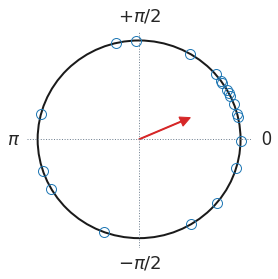

In [95]:
sns.set(font_scale=1.5, style='white')
ax = pg.plot_circmean(alpha_rad)

## Inferential Statistics

In [96]:
# Rayleigh test for uniformity
print('Alpha:\tz = %.2f, p = %.3f' % pg.circ_rayleigh(alpha_rad))
print('Beta:\tz = %.2f, p = %.3f' % pg.circ_rayleigh(beta_rad))

Alpha:	z = 4.06, p = 0.015
Beta:	z = 2.53, p = 0.078


## Correlations 

In [97]:
# Circular-circular correlations of alpha and beta
print('Circular-circular correlation:\tr = %.2f, p = %.3f' % pg.circ_corrcc(alpha_rad, beta_rad))

# Circular-linear correlation of alpha with range(20)
print('Circular-linear correlation:\tr = %.2f, p = %.3f' % pg.circ_corrcl(alpha_rad, np.arange(alpha_rad.size)))

Circular-circular correlation:	r = 0.67, p = 0.007
Circular-linear correlation:	r = 0.64, p = 0.017


## Part 2 | Neuron firing 

The dataset provides the orientation tuning properties of three neurons recorded from the primary visual cortex of awake macaques. The number of action potentials is modulated by the orientation of a visual stimulus. The main variables are (1) the stimulus orientations (spaced 22.5 degrees apart) and (2) the number of spikes fired in response to each orientation of the stimulus.

In [98]:
from pingouin import read_dataset

# Load Berens (2009) neuron dataset
df = read_dataset('circular')

df.head()

,Orientation,N1Spikes,N2Spikes,N3Spikes
0,0.0,63,25,10
1,22.5,66,15,5
2,45.0,79,12,5
3,67.5,171,2,0
4,90.0,101,12,2


## Descriptive Statistics 

Warning: the scipy.stats circular functions do not accept binned angle data.

In [99]:
# Convert the orientation to radians.
ori = pg.circ_axial(np.deg2rad(df['Orientation'].to_numpy()), 2)
spacing = np.diff(ori)[0]

# We will only focus on the first neuron.
spk = df['N1Spikes'].to_numpy()

# Circular mean angle
print('Circular mean:\t%.2f' % pg.circ_mean(ori, spk))

Circular mean:	2.36


## Inferential Statistics 

In [100]:
z, pval = pg.circ_rayleigh(ori, spk, spacing)
print('z = %.2f, p = %.3f' % (z, pval))

z = 42.83, p = 0.000


# ROUNDING

In [4]:
import pandas as pd
import pingouin as pg

x = [4, 5, 7, 4, 5, 6, 8, 9]
y = [3, 4, 5, 3, 4, 5, 4, 3]

## Method 1: Original (unrounded) 

By default, the values in Pingouin's dataframe outputs are stored in full precision, and displayed with a precision of 6 decimals.

In [5]:
pd.get_option("display.precision")

6

In [6]:
corr = pg.corr(x, y)
display(corr)
print("The full r value is", corr.at['pearson', 'r'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,8,0.1849,"[-0.6, 0.79]",0.034188,-0.352137,0.661133,0.468,0.071911


The full r value is 0.18490006540840973


## Method 2: Using pandas.DataFrame.round() 

The easiest way to round Pingouin's output is to use the pandas.DataFrame.round method, which will round all numeric columns to a specified number of decimals:

In [7]:
corr = pg.corr(x, y).round(3)
display(corr)
print("The full r value is", corr.at['pearson', 'r'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,8,0.185,"[-0.6, 0.79]",0.034,-0.352,0.661,0.468,0.072


The full r value is 0.185


## Method 3: Using Pingouin options

If we don't want to use .round() every time, there is also a way to define a global rounding option directly in Pingouin. Furthermore, this rounding can be set to be column-specific, which is great when you want to round some columns but keep the full precision for others (e.g. p-values).

In [8]:
# The default Pingouin options are:
# 'round': None -> by default, no rounding is applied
# 'round.column.CI95%': 2 -> except for the CI95% column, which is always rounded to 2 decimals
# 'round.column.BF10': custom string formatting for the Bayes Factor column
pg.options

{'round': None,
 'round.column.CI95%': 2,
 'round.column.BF10': <function pingouin.bayesian._format_bf(bf, precision=3, trim='0')>}

In [9]:
pg.options['round'] = 4
pg.options['round.column.CI95%'] = 3
pg.options['round.column.p-val'] = None
pg.options['round.column.BF10'] = None
pg.options

{'round': 4,
 'round.column.CI95%': 3,
 'round.column.BF10': None,
 'round.column.p-val': None}

In [10]:
corr = pg.corr(x, y)
display(corr)
print("The full r value is", corr.at['pearson', 'r'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,8,0.1849,"[-0.598, 0.787]",0.0342,-0.3521,0.661133,0.467674,0.0719


The full r value is 0.1849


In [11]:
# To reset the default options
pg.set_default_options()
pg.options

{'round': None,
 'round.column.CI95%': 2,
 'round.column.BF10': <function pingouin.bayesian._format_bf(bf, precision=3, trim='0')>}

## Method 4: Changing the display precision of Pandas dataframe¶

An alternative to rounding is to change the display.precision option of Pandas. The main advantage is that it actually preserves the full float precision.

In [12]:
pd.set_option("display.precision", 3)

corr = pg.corr(x, y)
display(corr)
print("The full r value is", corr.at['pearson', 'r'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,8,0.185,"[-0.6, 0.79]",0.034,-0.352,0.661,0.468,0.072


The full r value is 0.18490006540840973
